In [1]:
import tensorflow as tf
print(tf.__version__)

2024-06-18 19:27:52.367270: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 19:27:52.563828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 19:27:52.563875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 19:27:52.570345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 19:27:52.579336: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
print(type(X_train), X_train.shape) # 60,000 samples, each pic is a 28x28
print(type(X_test), X_test.shape)   # 10,000 samples, each pic is a 28x28
print(type(y_train), y_train.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000,)


In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
print(y_test.reshape(-1, 1).shape)
y_test.reshape(-1, 1)

(10000, 1)


array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

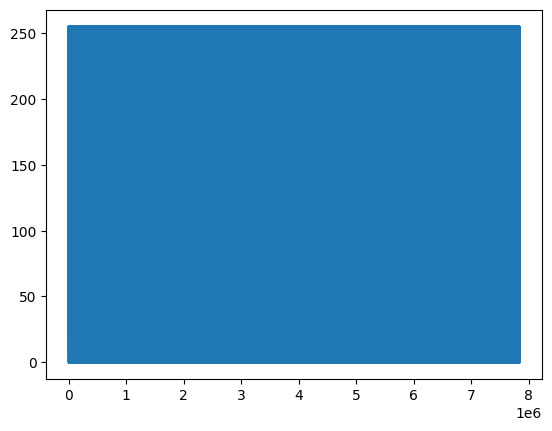

In [8]:
plt.plot(X_test.reshape(-1, 1))

In [9]:
X_train, X_test = X_train/255, X_test/255

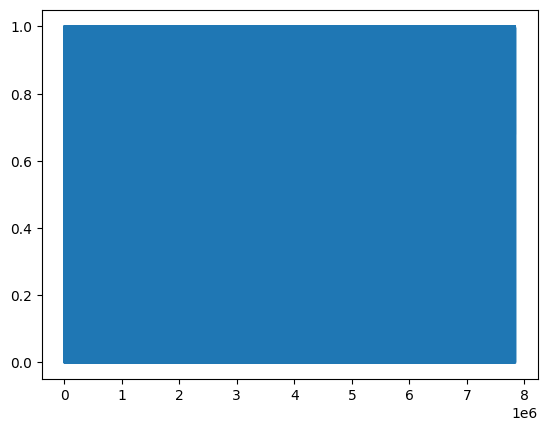

In [10]:
plt.plot(X_test.reshape(-1, 1))

In [11]:
# The data is only 2D
# Convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(type(X_train), X_train.shape) 
print(type(X_test), X_test.shape)
print(type(y_train), y_train.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)
<class 'numpy.ndarray'> (10000, 28, 28, 1)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000,)


In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
K = len(set(y_train))
# print("Total of classes:", K)

In [14]:
print(X_train[0].shape)
i = Input(shape=X_train[0].shape)
x = Conv2D( 32, (3,3), strides=2, activation='relu')(i)
x = Conv2D( 64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

(28, 28, 1)


2024-06-18 19:28:04.621081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 19:28:04.778373: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 19:28:04.778421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 19:28:04.785911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 19:28:04.785958: I external/local_xla/xla/stream_executor

In [15]:
model.compile(
    optimizer = "adam",
    loss      = "sparse_categorical_crossentropy",
    metrics   = ["accuracy"]
)
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15


2024-06-18 19:28:06.504945: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-18 19:28:06.746154: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-18 19:28:07.320348: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-18 19:28:07.766711: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f87bfdb1620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-18 19:28:07.766740: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-06-18 19:28:07.787179: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718749687.898740  124816 d

1875/1875 [==============================] - 12s 4ms/step - loss: 0.5269 - accuracy: 0.8055 - val_loss: 0.4213 - val_accuracy: 0.8396
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3694 - accuracy: 0.8610 - val_loss: 0.3475 - val_accuracy: 0.8709
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3188 - accuracy: 0.8795 - val_loss: 0.3255 - val_accuracy: 0.8777
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2845 - accuracy: 0.8921 - val_loss: 0.3018 - val_accuracy: 0.8872
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2597 - accuracy: 0.9029 - val_loss: 0.2902 - val_accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2371 - accuracy: 0.9108 - val_loss: 0.3062 - val_accuracy: 0.8919
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2193 - accuracy: 0.9161 - val_loss: 0.2939 - val_accuracy: 0.8964
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


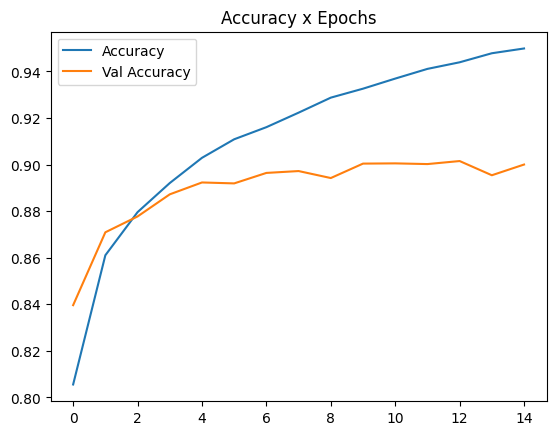

In [16]:
print(r.history.keys())
plt.plot(r.history['accuracy'], label="Accuracy");
plt.plot(r.history['val_accuracy'], label="Val Accuracy");
plt.title("Accuracy x Epochs");
plt.legend();

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


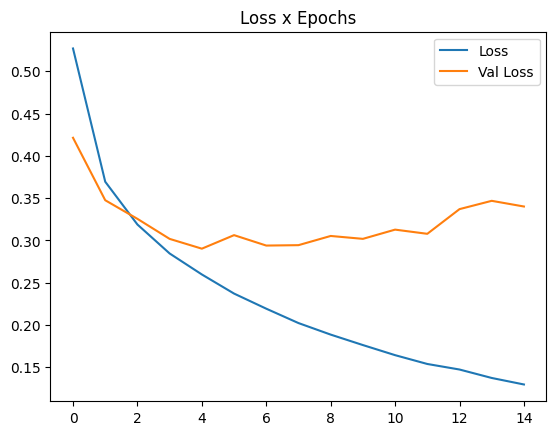

In [17]:
print(r.history.keys())
plt.plot(r.history['loss'], label="Loss");
plt.plot(r.history['val_loss'], label="Val Loss");
plt.title("Loss x Epochs");
plt.legend();

In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm. Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxix]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np. arange(len(classes))
    plt.xticks (tick_marks, classes, rotation=45)
    plt.yticks (tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color= "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[871   1  19  13   1   1  88   0   6   0]
 [  7 970   0  16   2   0   4   0   1   0]
 [ 25   1 819   8  70   0  76   0   1   0]
 [ 14   5  13 920  23   0  25   0   0   0]
 [  2   1  46  31 849   0  69   0   2   0]
 [  0   0   0   1   0 971   0  20   1   7]
 [125   0  50  22  89   0 706   0   8   0]
 [  0   0   0   0   0  16   0 965   0  19]
 [  5   2   2   2   6   3   4   2 973   1]
 [  1   0   0   0   0   6   0  37   0 956]]


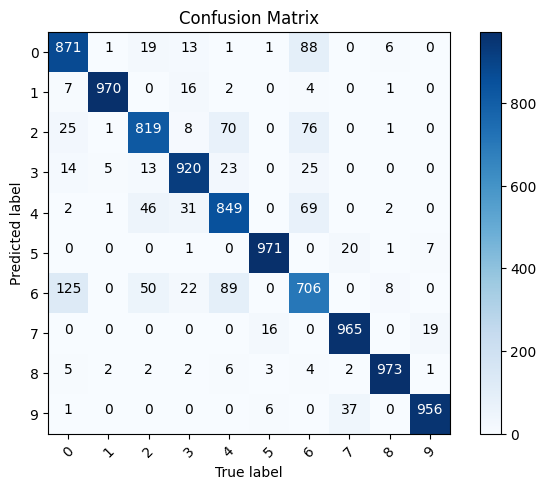

In [19]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Angle boot
'''.split()
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Angle',
 'boot']

Text(0.5, 1.0, 'True label: Coat - Predicted: Shirt')

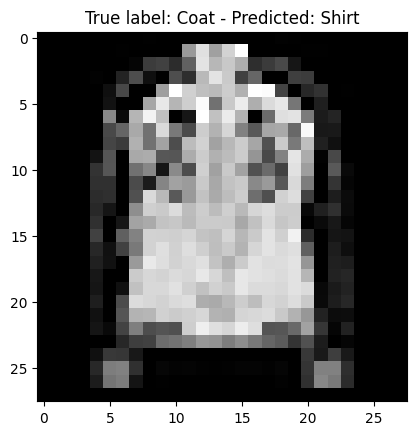

In [21]:
misclassified_idx = np.where(p_test != y_test)[0]

i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title(f"True label: {labels[y_test[i]]} - Predicted: {labels[p_test[i]]}")